In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [20]:
df = pd.read_csv("dataset_titanic.csv",sep=";")


In [21]:
df.drop("Cabin",axis = 1, inplace = True)

In [22]:
df.Age.mean()

29.69911764705882

In [23]:
df.Age.fillna(df.Age.mean(),inplace = True)

In [24]:
df.dropna(inplace = True, axis = 0)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [26]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                    "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                    "Lady" :      "Royalty",

                    "the Countess" : "Royalty",
    
                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}

q = []

for i in df["Name"]:
    title = i.split(".")[0].split(",")[1]
    q.append(title)
        
df["Status"] = q


In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mr


In [28]:
df["Status"].unique()

array([' Mr', ' Mrs', ' Miss', ' Dr', ' Major', ' Don', ' Master', ' Rev',
       ' Col', ' Mlle', ' Lady', ' Jonkheer', ' Mme', ' Sir', ' Capt',
       ' the Countess', ' Ms'], dtype=object)

In [29]:
df.drop(["PassengerId","Name","Ticket","Fare"],inplace = True,axis = 1)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Status
0,No,2,male,28.000000,0,0,S,Mr
1,No,3,male,25.000000,0,0,S,Mr
2,No,3,male,20.000000,0,0,S,Mr
3,No,3,female,29.000000,0,4,S,Mrs
4,No,1,male,31.000000,1,0,S,Mr
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,C,Mrs
887,No,3,male,22.000000,0,0,C,Mr
888,No,3,female,30.000000,0,0,S,Miss
889,No,3,male,29.699118,0,0,S,Mr


In [31]:
from sklearn.preprocessing import LabelEncoder

trnf_columns = ["Survived","Sex","Embarked",'Status']
lb = LabelEncoder()
for i in trnf_columns:
    df[i] = lb.fit_transform(df[i])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Status
0,0,2,1,28.000000,0,0,2,11
1,0,3,1,25.000000,0,0,2,11
2,0,3,1,20.000000,0,0,2,11
3,0,3,0,29.000000,0,4,2,12
4,0,1,1,31.000000,1,0,2,11
...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,0,12
887,0,3,1,22.000000,0,0,0,11
888,0,3,0,30.000000,0,0,2,8
889,0,3,1,29.699118,0,0,2,11


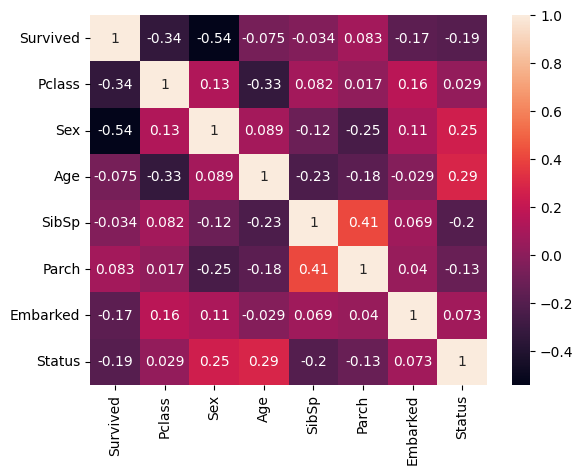

In [32]:
s = sn.heatmap(data = df.corr(),annot = True)
plt.show()

simple Linear 

In [48]:
data = df

x= data["Survived"].values.reshape(-1,1)
y= data["Age"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 175.8340908959319
R squared 0.004147940751119905


simple regression 

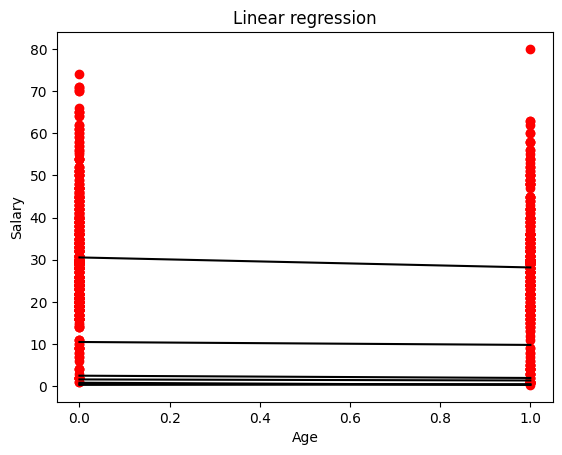

In [49]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 
plt.show()

Multilinear regression

In [43]:
data = df

x= data["Survived"].values.reshape(-1,1)
y= data[df.columns[1:]].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 25.94189032316286
R squared 0.07469164087312993


Polynear regression

In [46]:


poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
lg=LinearRegression()
lg.fit(x_poly, y)


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 25.94189032316286
R squared 0.07469164087312993
